In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pal = sns.color_palette()

In [3]:
df_train = pd.read_csv('Data/train.csv')
df_train = df_train.sample(frac=1)
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
99707,99707,165492,165493,Anyone interested in Imports and exports busin...,What kind of man to attract a woman?,0
385512,385512,517662,517663,What background verification services allow me...,What background verification services or websi...,1
95661,95661,159475,159476,Why is the American presidential election camp...,Why does the US presidential election campaign...,1
289703,289703,17115,410867,What was the main cause of World War One?,What was the immediate cause of the First Worl...,1
8977,8977,17470,17471,Who is the most powerful mutant in the X-Men u...,What is the most powerful mutant power in X Men?,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404290 entries, 99707 to 268518
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [5]:
df_train.shape

(404290, 6)

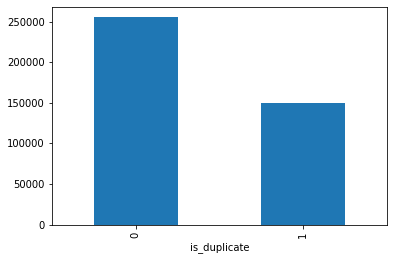

In [6]:
df_train.groupby("is_duplicate")['id'].count().plot.bar()


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780



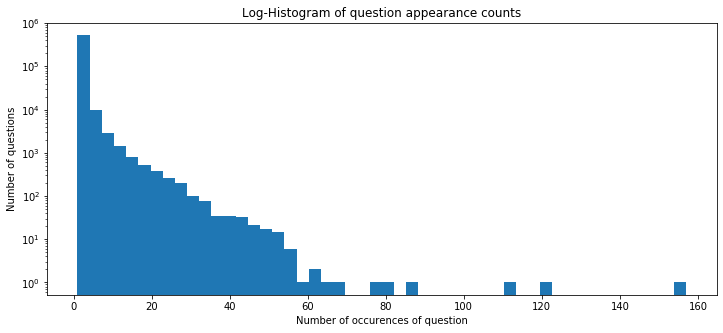

In [7]:
#Question appearance count
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


IndexError: tuple index out of range

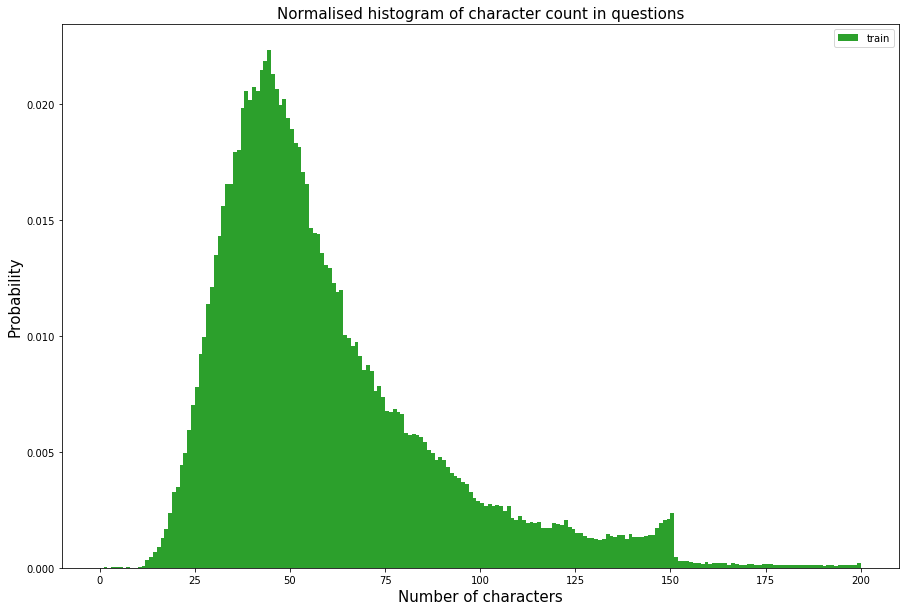

In [8]:
#Distribution of char counts across different questions
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} '.format(dist_train.mean(), 
                          dist_train.std(),  dist_train.max()))

#One thing that catches my eye is the steep cut-off at 150 characters for the training set, for most questions,
#while the test set slowly decreases after 150. Could this be some sort of Quora question size limit?

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


IndexError: tuple index out of range

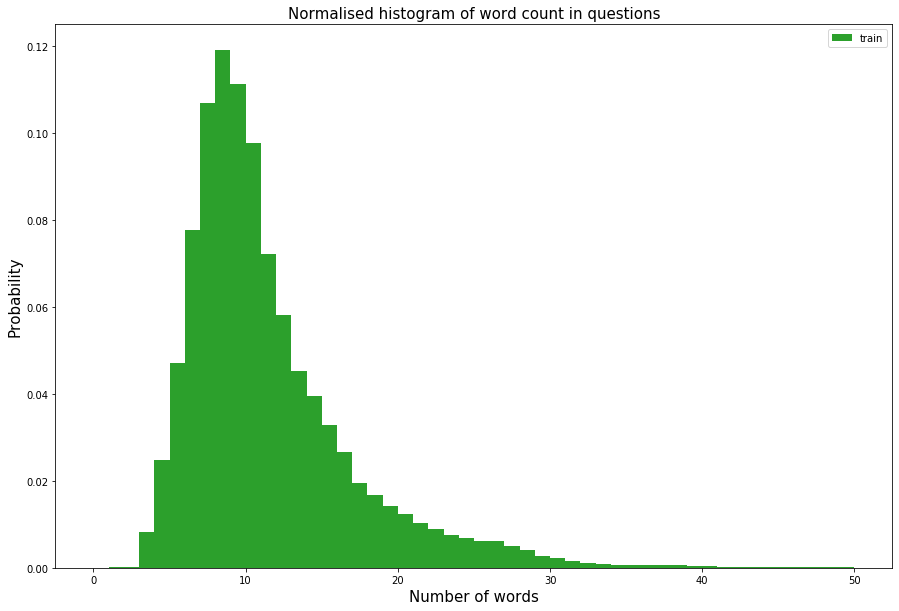

In [9]:
#Distribution of word counts across different questions
dist_train = train_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)


print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), dist_train.std(), dist_train.max()))

(-0.5, 1439.5, 1079.5, -0.5)

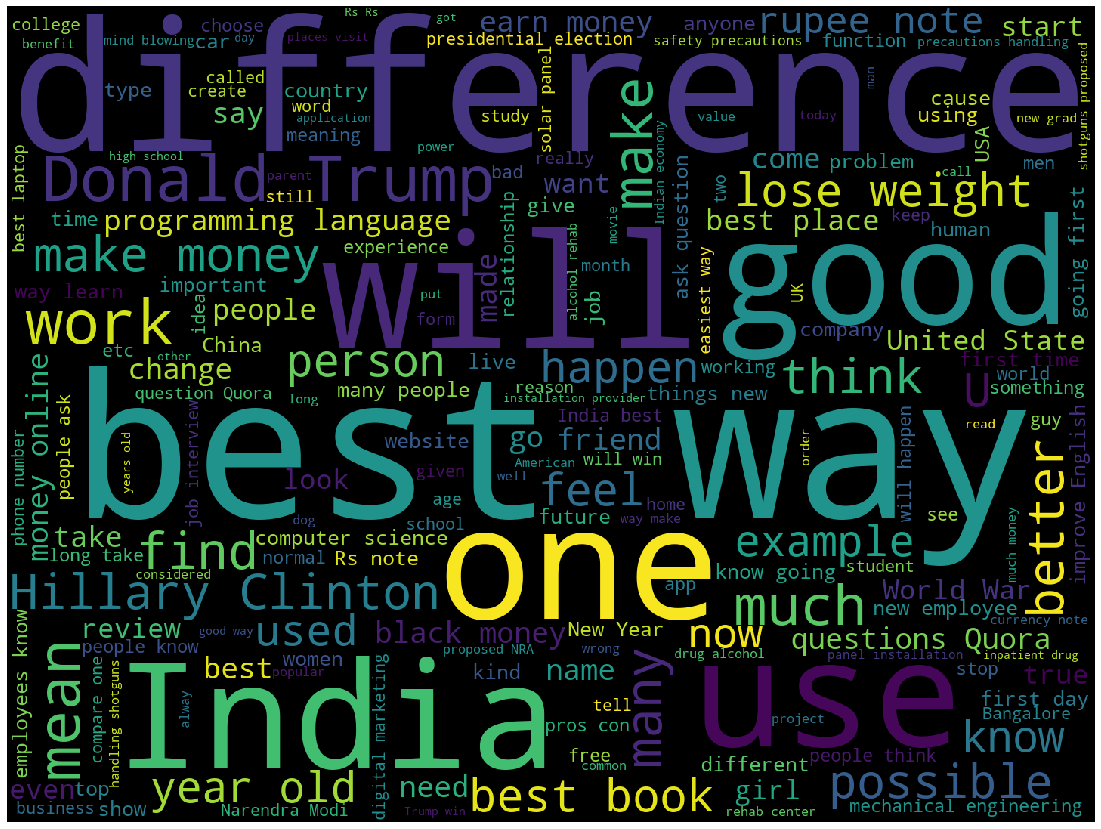

In [10]:
#Wordcloud
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [11]:
#Semantic Analysis
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


99707     0.000000
385512    0.857143
95661     0.571429
289703    0.250000
8977      0.285714
            ...   
112582    1.000000
93221     0.090909
131904    1.000000
84594     0.000000
268518    0.333333
Length: 404290, dtype: float64


/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0.5, 0, 'word_match_share')

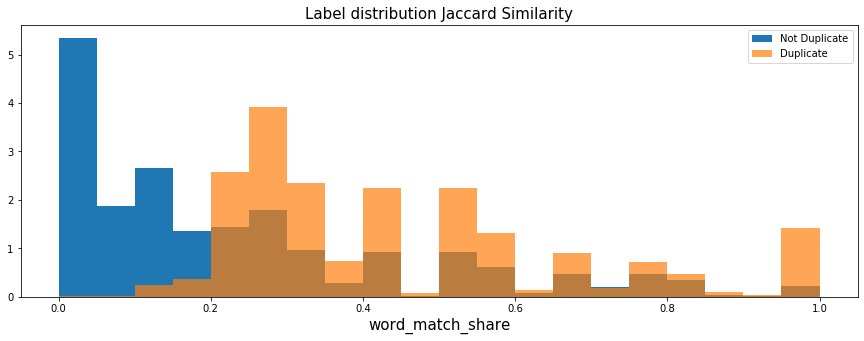

In [12]:
#Jacaard Similarity
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))


def get_jaccard_sim(row):
    str1 = row['question1']
    str2 = row['question2']
    q1 = str(str1).lower().split()
    q2 = str(str2).lower().split()
    q1 = [w for w in q1 if w not in stops]
    q2 = [w for w in q2 if w not in stops]
    
    a = set(q1) 
    b = set(q2)
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

plt.figure(figsize=(15, 5))
train_word_match_get_jaccard_sim = df_train.apply(get_jaccard_sim, axis=1, raw=True)
train_word_match_get_jaccard_sim
print(train_word_match_get_jaccard_sim)
plt.hist(train_word_match_get_jaccard_sim[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match_get_jaccard_sim[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution Jaccard Similarity', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [13]:
#Normalized WMD
import gensim
def norm_wmd(row):
    str1 = row['question1']
    str2 = row['question2']
    q1 = str(str1).lower().split()
    q2 = str(str2).lower().split()
    stop_words = stopwords.words('english')
    q1 = [w for w in q1 if w not in stop_words]
    q2 = [w for w in q2 if w not in stop_words]
    return norm_model.wmdistance(q1, q2)

norm_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
norm_model.init_sims(replace=True)



In [14]:
norm_wmd = df_train.apply(norm_wmd, axis=1, raw=True)

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0.5, 0, 'word_movers_distance')

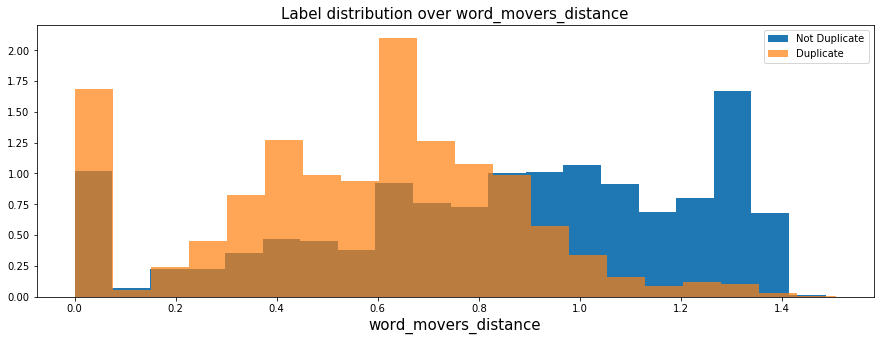

In [15]:
df_norm_wmd=norm_wmd.to_frame()
plt.figure(figsize=(15, 5))
plt.hist(df_norm_wmd[np.isfinite(df_norm_wmd[df_train['is_duplicate'] == 0])].values, bins=20,  normed=True, label='Not Duplicate')
plt.hist(df_norm_wmd[np.isfinite(df_norm_wmd[df_train['is_duplicate'] == 1])].values, bins=20,  normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_movers_distance', fontsize=15)
plt.xlabel('word_movers_distance', fontsize=15)

In [16]:

from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [17]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 


[('craven', 9.998000399920016e-05),
 ('1.67a', 9.998000399920016e-05),
 ('leroy', 9.998000399920016e-05),
 ('289/300', 9.998000399920016e-05),
 ('(hawaiian', 9.998000399920016e-05),
 ('surfers)', 9.998000399920016e-05),
 ('reminders?', 9.998000399920016e-05),
 ('ringtones?', 9.998000399920016e-05),
 ('bahammas', 9.998000399920016e-05),
 ('recurring?', 9.998000399920016e-05)]

In [18]:
#TF-IDF
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0.5, 0, 'word_match_share')

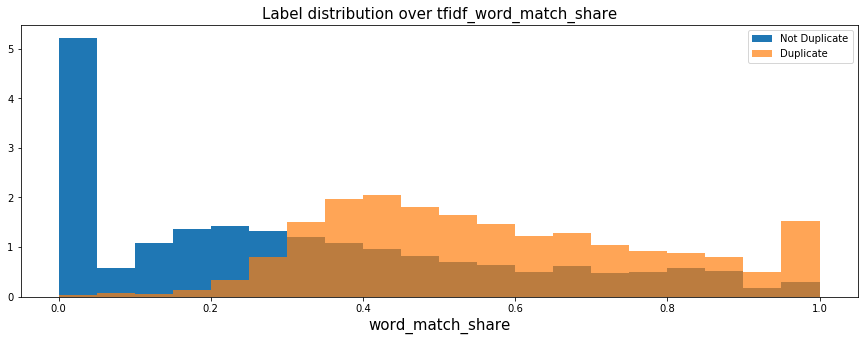

In [19]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [20]:
#training and validation
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match_get_jaccard_sim
x_train['tfidf_word_match'] = tfidf_train_word_match
x_train['norm_wmd'] = norm_wmd
y_train = df_train['is_duplicate'].values

In [21]:
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

# Now we oversample the negative class

p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -=1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(len(pos_train) / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

0.19124366100096607


In [22]:
#split some of the data off for validation
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

In [23]:
#XGBoost
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
model.fit(x_train, y_train) 
prediction = model.predict(x_valid)
cm = confusion_matrix(y_valid, prediction)  
print(cm)  
print('Accuracy', accuracy_score(y_valid, prediction))
print(classification_report(y_valid, prediction))

[[120565   5264]
 [ 19765  10504]]
Accuracy 0.8396584197106945
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91    125829
         1.0       0.67      0.35      0.46     30269

    accuracy                           0.84    156098
   macro avg       0.76      0.65      0.68    156098
weighted avg       0.82      0.84      0.82    156098



In [24]:
model.feature_importances_

array([0.07269007, 0.5046324 , 0.4226775 ], dtype=float32)

In [25]:
y_valid

[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0

# Hypertuning

In [26]:
#Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {
      'colsample_bytree':[0.7],
      'gamma':[0],
      'min_child_weight':[3],
      'learning_rate':[0.01,0.1],
      'max_depth':[10],
      'n_estimators':[500,1000],
#     'reg_alpha':[.1,.01,.001],
#     'reg_lambda':[.1,.01,.001],
      'subsample':[0.8]  
}
model_xgb=xgb.XGBClassifier()
grid_search = GridSearchCV(estimator = model_xgb, param_grid = parameters,n_jobs=-1,iid=False, verbose=10,scoring='accuracy')
grid_search.fit(x_train,y_train)
print('best params:',grid_search.best_params_)
print('best score:',grid_search.best_score_)

/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed: 16.5min remaining: 11.8min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed: 17.0min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 25.8min finished


best params
{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 1000, 'subsample': 0.8}
best score
0.8278490309309413


# Implementation using ANN

In [27]:
#training and validation
DataSet = pd.DataFrame()
DataSet['word_match'] = train_word_match_get_jaccard_sim
DataSet['tfidf_word_match'] = tfidf_train_word_match
DataSet['norm_wmd'] = norm_wmd
DataSet['is_duplicate'] = df_train['is_duplicate']
# y_train_nn = df_train['is_duplicate'].values

In [28]:
DataSet
#DataSet.isnull().any()

,word_match,tfidf_word_match,norm_wmd,is_duplicate
99707,0.000000,0.000000,1.285397,0
385512,0.857143,0.927675,0.186108,1
95661,0.571429,0.755014,0.539584,1
289703,0.250000,0.375356,0.651771,1
8977,0.285714,0.454762,0.614120,0
...,...,...,...,...
112582,1.000000,1.000000,0.000000,1
93221,0.090909,0.149748,1.057409,0
131904,1.000000,1.000000,0.000000,1
84594,0.000000,0.000000,1.341278,0


In [29]:
DataSet.isnull().sum().sum()

20

In [30]:
np.isfinite(DataSet).all()

word_match           True
tfidf_word_match    False
norm_wmd            False
is_duplicate         True
dtype: bool

In [31]:
DataSet = DataSet[np.isfinite(DataSet).all(1)]

# DataSet.replace([np.inf, -np.inf], np.nan, inplace=True)
# DataSet.dropna()

# DataSet.replace([np.inf, -np.inf], np.nan)
# DataSet.dropna()
#DataSet.replace([np.inf, -np.inf], np.nan).dropna(subset=["word_match", "tfidf_word_match"], how="all")

In [32]:
x=DataSet.iloc[:,:-1].values
y=DataSet.iloc[:,-1].values

In [33]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Initializing the ANN

In [35]:
import tensorflow as tf1
ann2=tf1.keras.models.Sequential()
##Adding the input layer and the first hidden layer
ann2.add(tf1.keras.layers.Dense(units=15,activation='relu')) ## Using rectifier activation function 'relu'
ann2.add(tf1.keras.layers.Dense(units=15,activation='relu')) ## Adding second hidden layer
ann2.add(tf1.keras.layers.Dense(units=15,activation='relu'))
ann2.add(tf1.keras.layers.Dense(units=15,activation='relu'))
ann2.add(tf1.keras.layers.Dense(units=15,activation='relu'))
ann2.add(tf1.keras.layers.Dense(units=15,activation='relu'))
ann2.add(tf1.keras.layers.Dense(units=15,activation='relu'))
ann2.add(tf1.keras.layers.Dense(units=15,activation='relu'))
ann2.add(tf1.keras.layers.Dense(units=15,activation='relu'))
ann2.add(tf1.keras.layers.Dense(units=15,activation='relu'))
ann2.add(tf1.keras.layers.Dense(units=1,activation='sigmoid')) ##Adding output layer
ann2.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['accuracy'])##Compiling the ANN

In [36]:
ann2.fit(x_train,y_train, batch_size=128, epochs=200)
y_pred=ann2.predict(x_test)
y_pred=(y_pred > 0.5).astype('int')
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

Epoch 1/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4746 - accuracy: 0.7217
Epoch 2/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4631 - accuracy: 0.7357
Epoch 3/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4595 - accuracy: 0.7412
Epoch 4/200
2459/2459 [==============================] - 4s 2ms/step - loss: 0.4581 - accuracy: 0.7423
Epoch 5/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4575 - accuracy: 0.7431: 0s - loss: 0.457
Epoch 6/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4571 - accuracy: 0.7432
Epoch 7/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4566 - accuracy: 0.7439
Epoch 8/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4567 - accuracy: 0.7436
Epoch 9/200
2459/2459 [==============================] - 4s 1ms/step - loss: 0.4564 - accuracy: 0.7444
Epoch 10/200
2459/2459 [==============================]

2459/2459 [==============================] - 4s 2ms/step - loss: 0.4513 - accuracy: 0.7493
Epoch 149/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4514 - accuracy: 0.7494
Epoch 150/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4514 - accuracy: 0.7492: 1s - loss: 0
Epoch 151/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4513 - accuracy: 0.7491
Epoch 152/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4514 - accuracy: 0.7493
Epoch 153/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4516 - accuracy: 0.7489
Epoch 154/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4513 - accuracy: 0.7492
Epoch 155/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4512 - accuracy: 0.7495
Epoch 156/200
2459/2459 [==============================] - 3s 1ms/step - loss: 0.4513 - accuracy: 0.7491
Epoch 157/200
2459/2459 [==============================

0.7474385376147256